# **Pokemon Catch Them all**

## Objectives

* To determine which Pokemon wins the game by understanding which characteristics help them in a combat.

* The Kaggle dataset called "Pokemon with stats" and "Pokemon- Weedle's Cave", was used as raw data and saved under the raw folder, ["Pokemon with Stats" for "pokemon"]( https://www.kaggle.com/datasets/abcsds/pokemon/data) and ["Pokemon- Weedle's Cave" for "combats"]( https://www.kaggle.com/datasets/terminus7/pokemon-challenge?select=pokemon.csv).

## Inputs

* The input was "pokemon.csv" and "combats.csv"

## Outputs

* The output was "pokemon_cleaned.csv" 

## Additional Comments

* Two files were given, "pokemon.csv" has information on the Pokemon's characteristics and "combats.csv" are the results of a previous battle. This will be needed for the machine learning model to predict the winner and also to train the data.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [8]:
import os
current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /Users/danielledelouw/Documents/code_institute/Pokemon_catch_them_all


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [9]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [10]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute'

# Section 1

ETL Investigation

In [19]:
#Load python libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

Extraction: Load the Dataset

In [ ]:
#read Pokemon csv
print("Loading Pokemon dataset")
df = pd.read_csv('../Dataset/raw/pokemon.csv')
df

#from Kaggel the descriptions of the columns are as follows:
#: ID for each pokemon
# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# Sp. Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# Sp. Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round
# Generation: the generation of the pokemon, used to determine which pokemon are available in each game
# Legendary: whether the pokemon is a legendary or not, these are usually stronger and rarer

Loading Pokemon dataset


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
#read Combats csv
# this dataset will be used to train the model, it provides information on which pokemon won against which
# I intend to use it and join the tables in the end
print("Loading Combats dataset")
df_combats = pd.read_csv('../Dataset/raw/combats.csv')
df_combats

Loading Combats dataset


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [8]:
#  Initial Inspection Pokemon Dataset
print("Initial Inspection of Pokemon Dataset")
print(f"Initial shape:", df.shape)
print(df.head())

Initial Inspection of Pokemon Dataset
Initial shape: (800, 13)
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [9]:
print(f"Columns in dataset: {df.columns}")

Columns in dataset: Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [ ]:
print("Checking the DataFrame info:") 
df.info()
# I may want to drop a few columns later like index #, Generation and Legendary as 
# they don't add much value to the analysis.

Checking the DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
df.describe(include=[np.number])

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
# Check total null valuesif values in dataframe  
df.isnull()
df.isnull().sum()
# null values exist in the Type 2 column, this is because some pokemon have two types, 
# this determines weakness/resistance to attacks

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)
# there are no duplicate rows

Duplicate Rows:
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []


In [15]:
# Check for unique values per column
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [16]:
# Checking data types
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

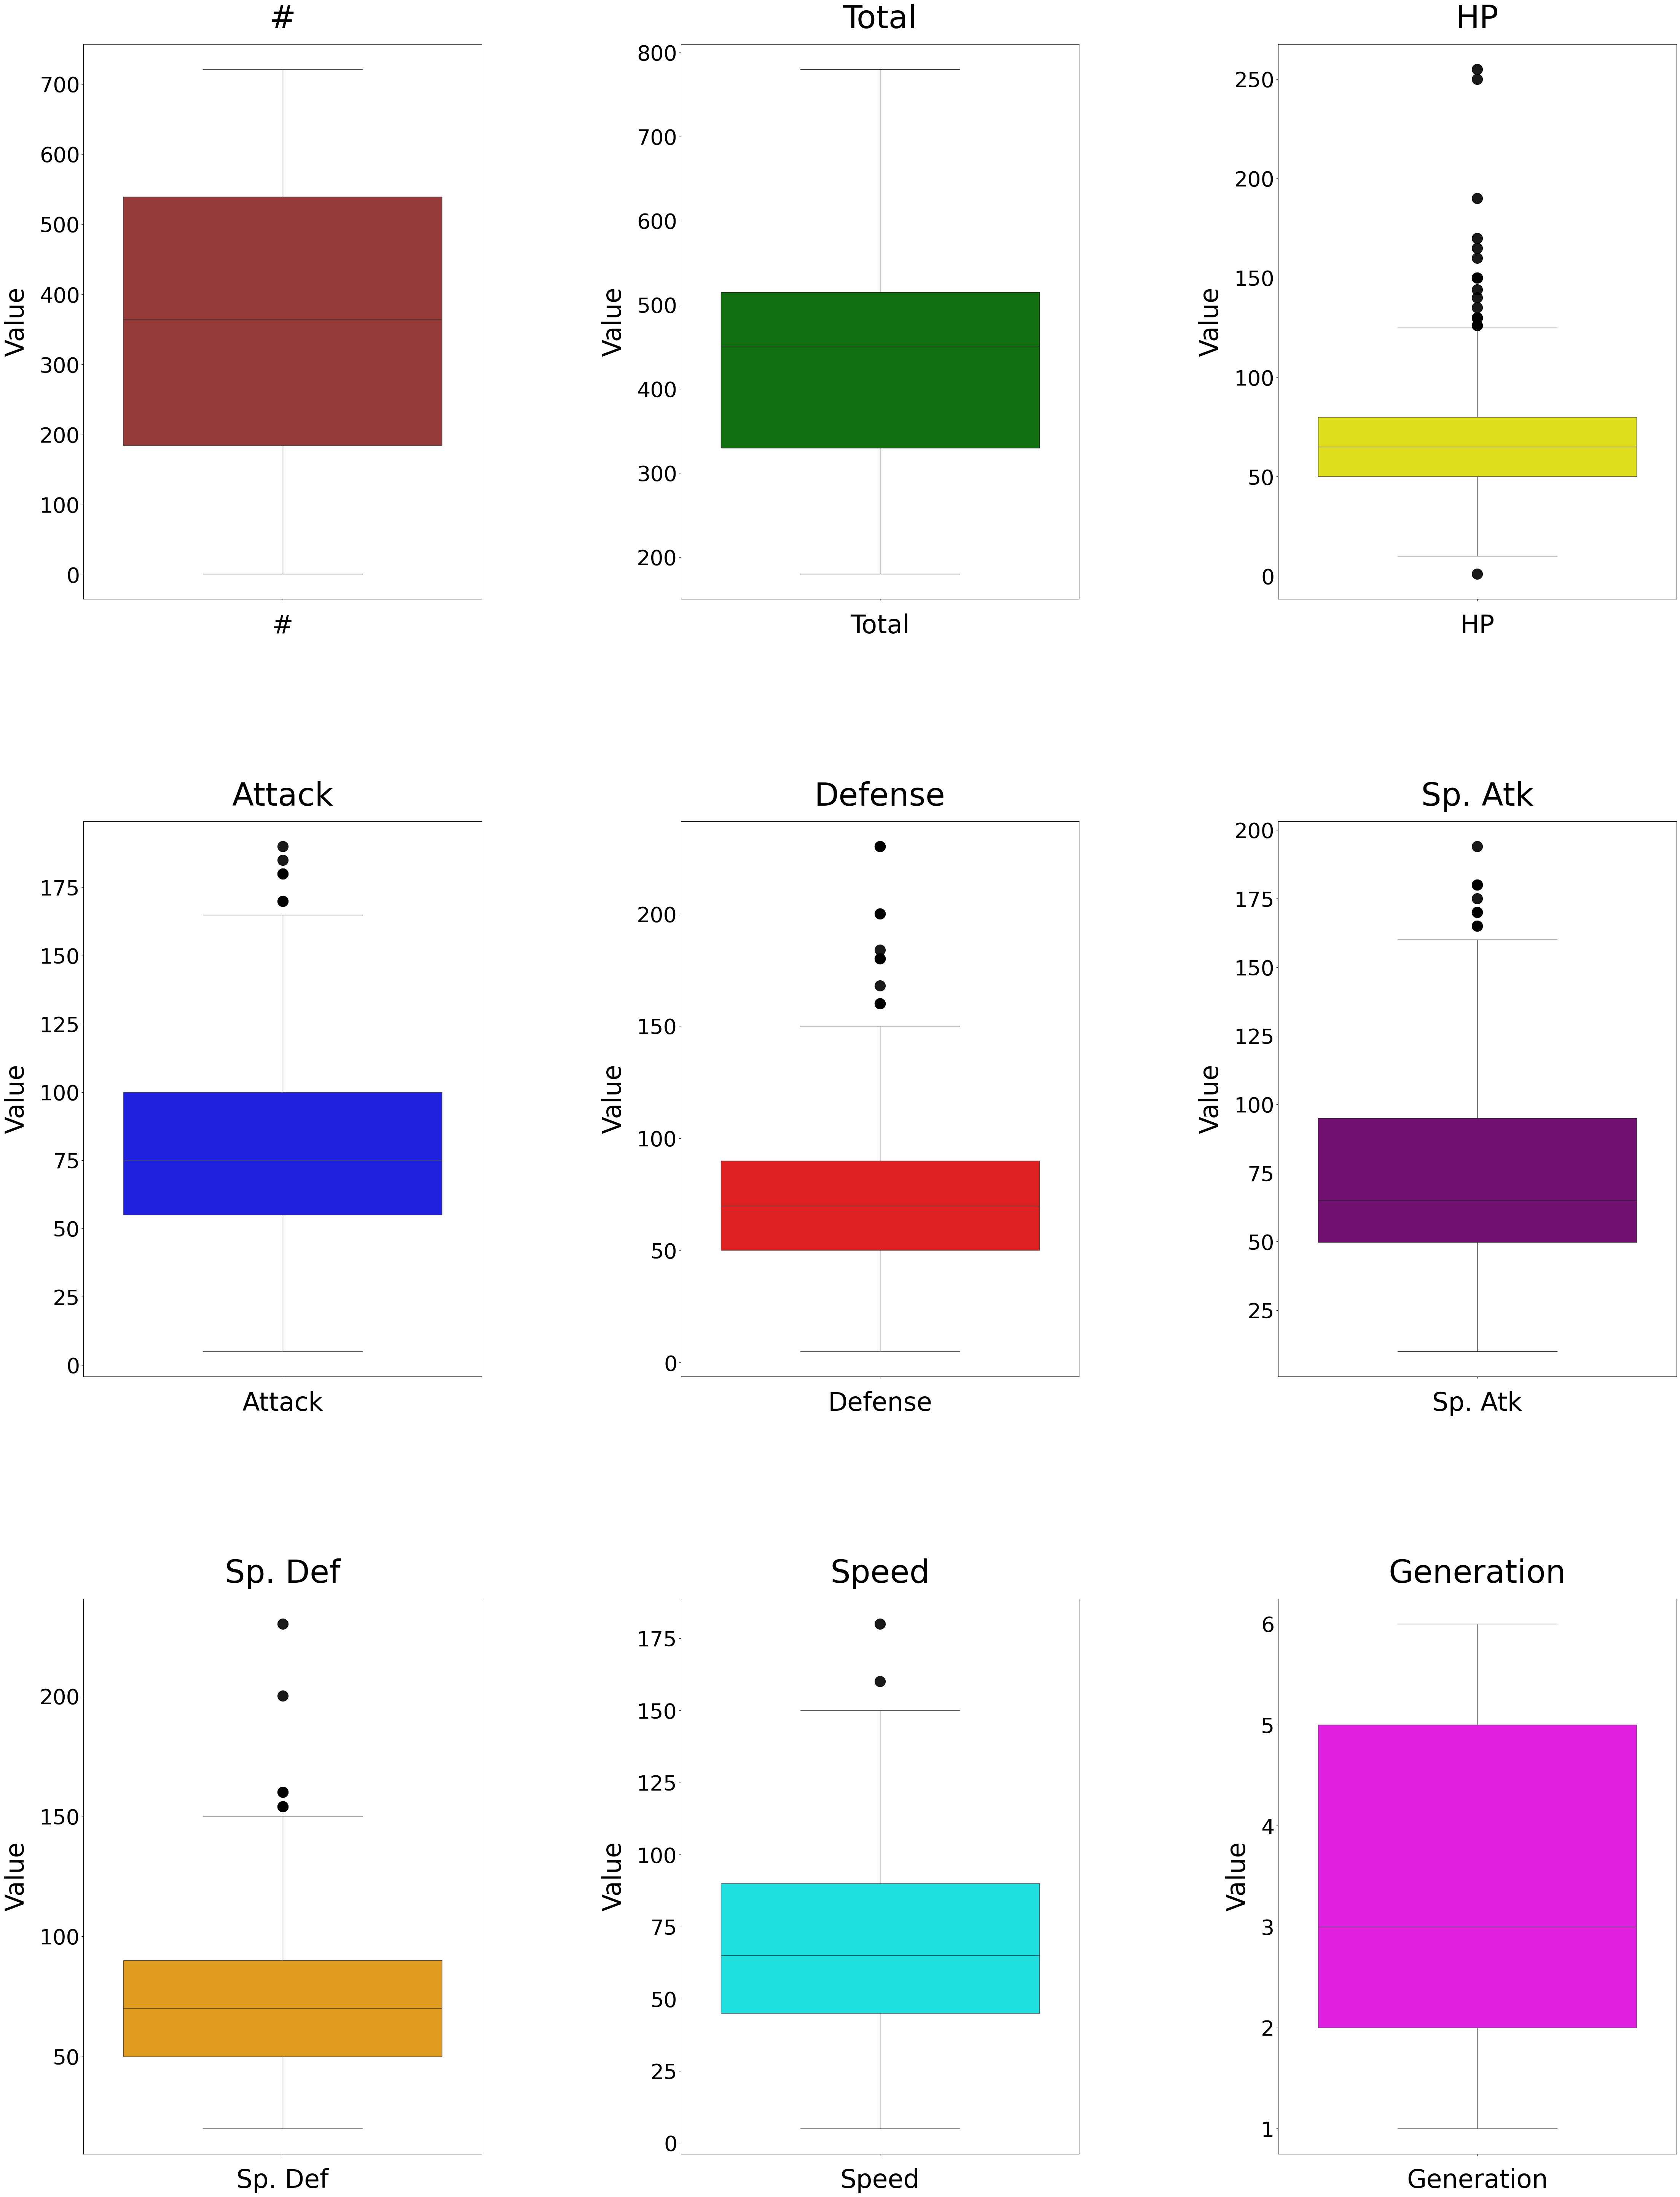

In [ ]:
#Creating boxplots for each numeric column in the dataset

# Select all numeric columns from the dataframe
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)

# Set the number of subplots per row
cols_per_row = 3
nrows = (num_plots + cols_per_row - 1) // cols_per_row  # Calculate required rows

# Create subplots with increased figure size for better visibility
fig, ax = plt.subplots(nrows, cols_per_row, figsize=(18 * cols_per_row, 24 * nrows))
ax = ax.flatten()  # Flatten the axes array for easy iteration

# Define a list of colors for the boxplots
colors = ['brown', 'green', 'yellow', 'blue', 'red', 'purple', 'orange', 'cyan', 'magenta', 'gray']

# Define properties for outlier markers in the boxplots
flierprops = dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=20, alpha=0.9)

# Draw a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        data=df[col],
        ax=ax[i],
        color=colors[i % len(colors)],
        flierprops=flierprops
    )
    ax[i].set_title(col, fontsize=60, pad=30)
    ax[i].set_xlabel(col, fontsize=48, labelpad=20)
    ax[i].set_ylabel('Value', fontsize=48, labelpad=20)
    ax[i].set_xticklabels([])  # Hide x-tick labels
    ax[i].tick_params(axis='y', labelsize=40)  # Set y-tick label size

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()